# Mental Health Prediction - EDA and Multiple Linear Regression
This notebook performs Exploratory Data Analysis (EDA) and builds Multiple Linear Regression models to predict mental health conditions based on social, economic, and environmental factors.

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 2: Load the Dataset
df = pd.read_csv('Final_ Merged_Dataset capstone.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Province                            100 non-null    object 
 1   YEAR                                100 non-null    int64  
 2   QUARTER                             100 non-null    int64  
 3   Quarterly Avg Temp (°C)             100 non-null    float64
 4   Quarterly Sum Precip (mm)           100 non-null    int64  
 5   CPI                                 100 non-null    float64
 6   Excellent_Very_Good                 100 non-null    float64
 7   Good                                100 non-null    float64
 8   Fair_Poor                           100 non-null    float64
 9   Debt_to_Asset_Ratio                 100 non-null    float64
 10  Mortgage_Debt_to_Real_Estate_Ratio  100 non-null    float64
 11  Depression                          100 non-nu

,Province,YEAR,QUARTER,Quarterly Avg Temp (°C),Quarterly Sum Precip (mm),CPI,Excellent_Very_Good,Good,Fair_Poor,Debt_to_Asset_Ratio,Mortgage_Debt_to_Real_Estate_Ratio,Depression,Anxiety,Mental Health Help,Therapy,Stress,Unemplyment Rate
0,Alberta,2021,2,9.71,76,148.4,41.1,34.3,24.6,0.180577,0.335439,0.17,0.35,<1%,0.35,0.13,8.700000
1,Alberta,2021,3,16.42,155,150.7,49.0,33.6,17.4,0.176848,0.319559,0.16,0.36,<1%,0.35,0.13,8.066667
2,Alberta,2021,4,-1.49,50,151.6,43.7,31.3,25.0,0.168751,0.298740,0.17,0.35,<1%,0.34,0.14,7.366667
3,Alberta,2022,1,-2.69,35,154.6,46.3,32.3,21.4,0.168129,0.290180,0.16,0.32,<1%,0.37,0.15,6.600000
4,Alberta,2022,2,8.29,191,159.2,45.9,31.1,23.0,0.178188,0.312411,0.17,0.32,<1%,0.37,0.14,5.733333


In [4]:
# Step 3: Exploratory Data Analysis (EDA)
df.describe()

,YEAR,QUARTER,Quarterly Avg Temp (°C),Quarterly Sum Precip (mm),CPI,Excellent_Very_Good,Good,Fair_Poor,Debt_to_Asset_Ratio,Mortgage_Debt_to_Real_Estate_Ratio,Depression,Anxiety,Therapy,Stress,Unemplyment Rate
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.000000,2.500000,8.407100,225.370000,151.736333,47.761000,32.996000,19.238000,0.151082,0.265834,0.189500,0.345800,0.291200,0.173500,6.721500
std,0.778499,1.029857,9.006866,137.730058,7.182064,5.289973,2.649563,4.032789,0.014575,0.045204,0.026756,0.052555,0.061039,0.055293,2.197854
min,2021.000000,1.000000,-14.810000,7.000000,135.366667,37.300000,24.000000,8.400000,0.125616,0.176464,0.140000,0.210000,0.170000,0.120000,3.966667
25%,2021.000000,2.000000,3.500000,105.000000,145.866667,44.675000,31.375000,16.775000,0.139396,0.231860,0.170000,0.320000,0.247500,0.140000,5.075000
50%,2022.000000,2.500000,10.045000,230.500000,153.133333,46.900000,32.700000,19.750000,0.149366,0.263135,0.190000,0.350000,0.290000,0.160000,6.350000
75%,2023.000000,3.000000,17.067500,319.000000,157.500000,49.950000,34.550000,22.125000,0.158274,0.307518,0.200000,0.370000,0.340000,0.170000,7.566667
max,2023.000000,4.000000,21.300000,567.000000,166.266667,67.600000,41.700000,27.200000,0.181395,0.342623,0.270000,0.470000,0.420000,0.360000,13.466667


In [5]:
# Check for missing values
df.isnull().sum()

Province                               0
YEAR                                   0
QUARTER                                0
Quarterly Avg Temp (°C)                0
Quarterly Sum Precip (mm)              0
CPI                                    0
Excellent_Very_Good                    0
Good                                   0
Fair_Poor                              0
Debt_to_Asset_Ratio                    0
Mortgage_Debt_to_Real_Estate_Ratio     0
Depression                             0
Anxiety                                0
Mental Health Help                    62
Therapy                                0
Stress                                 0
Unemplyment Rate                       0
dtype: int64

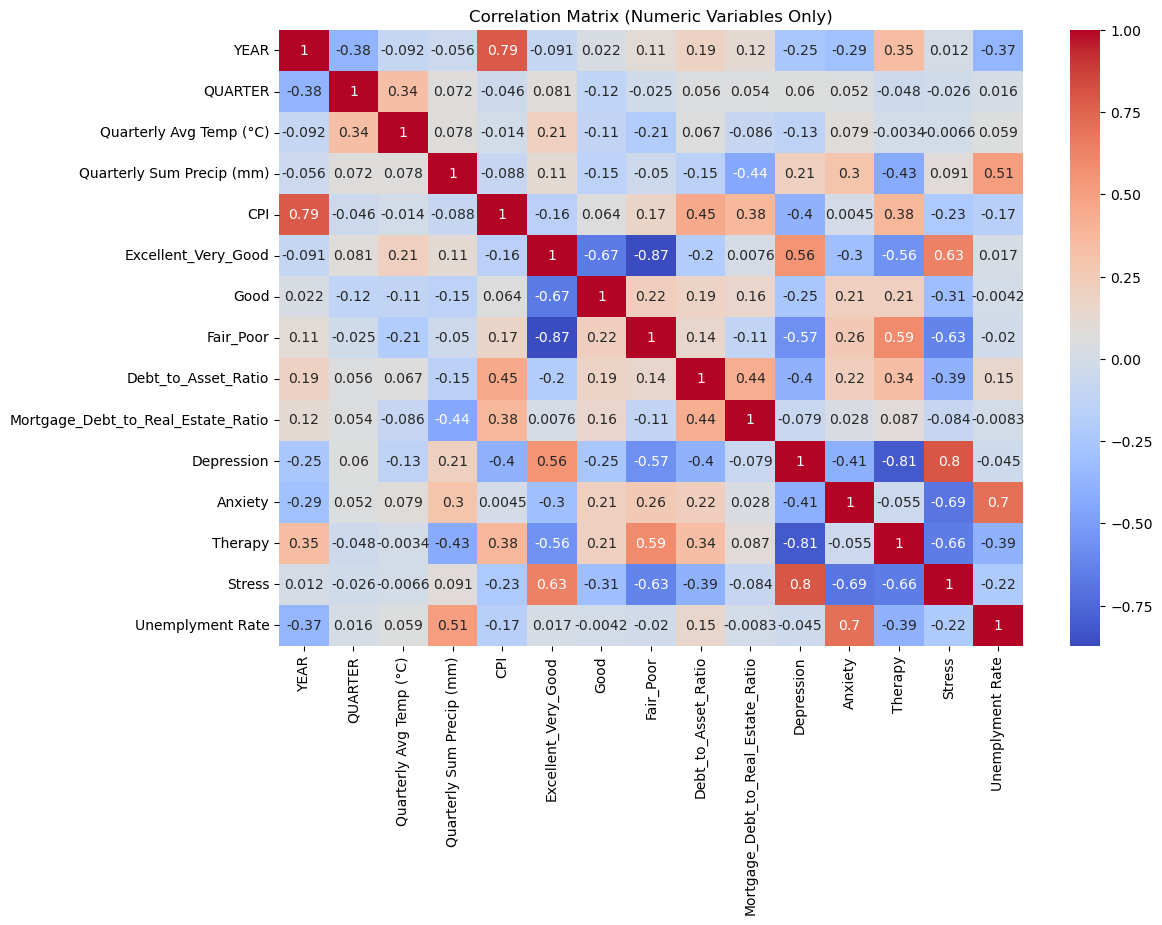

In [7]:
# Correlation Heatmap (only numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])  # only keep numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()


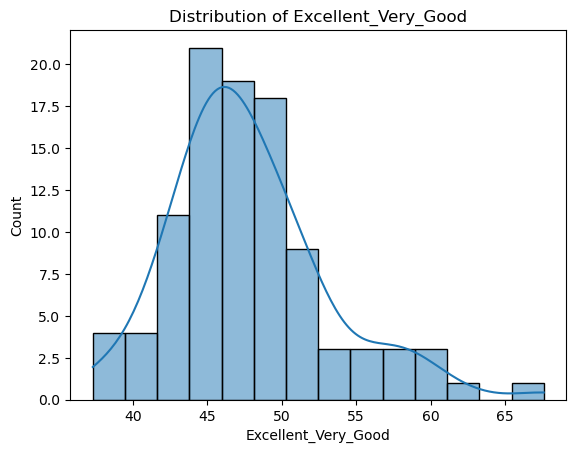

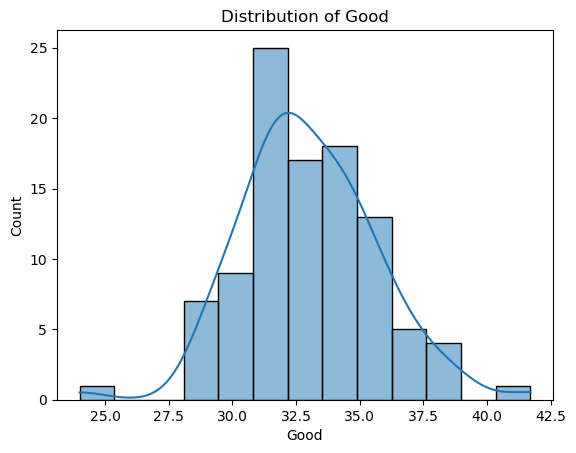

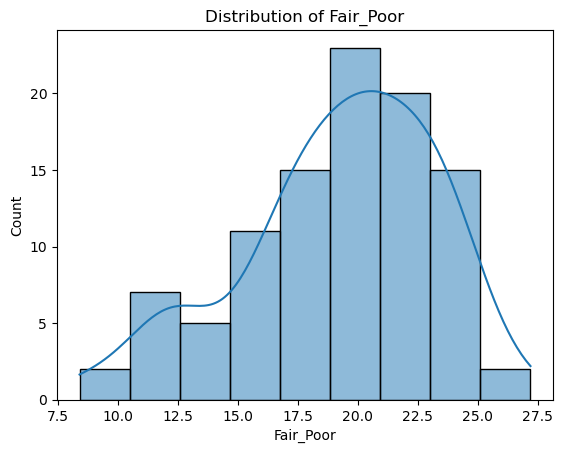

In [10]:
# Distribution plots for target variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Excellent_Very_Good'], kde=True)
plt.title('Distribution of Excellent_Very_Good')
plt.show()

sns.histplot(df['Good'], kde=True)
plt.title('Distribution of Good')
plt.show()

sns.histplot(df['Fair_Poor'], kde=True)
plt.title('Distribution of Fair_Poor')
plt.show()


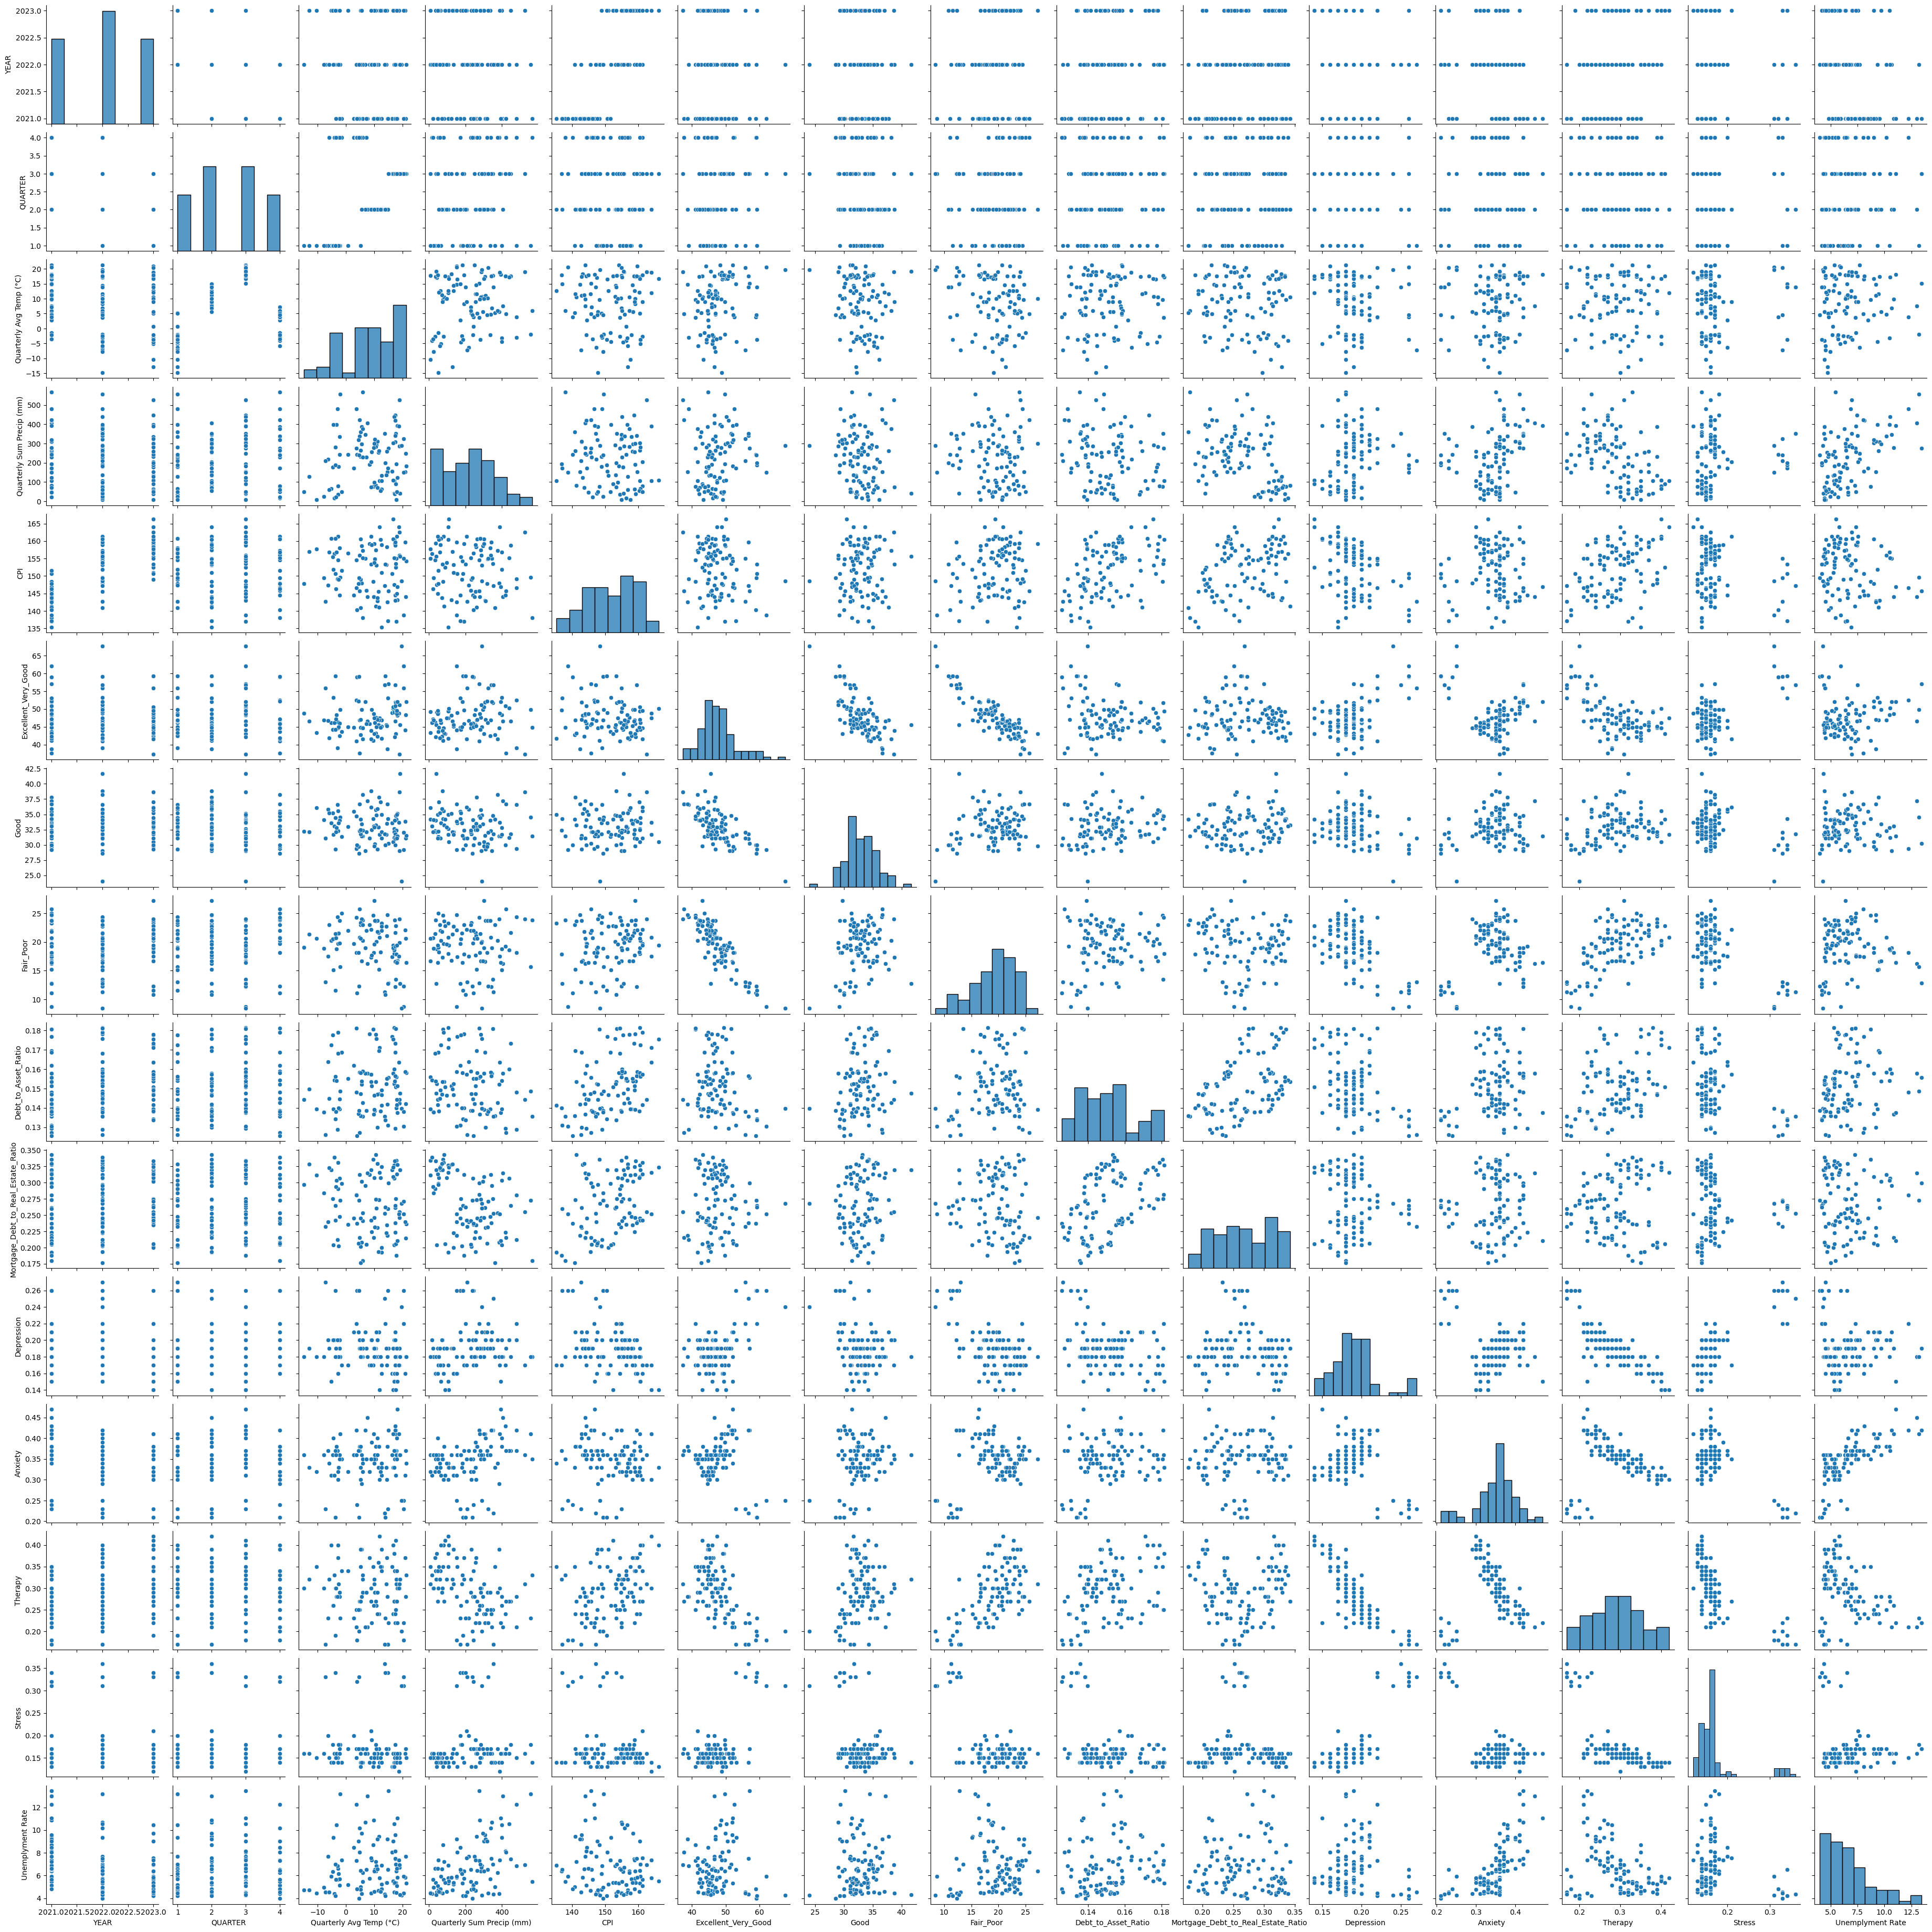

In [12]:
# Pairplot
sns.pairplot(df)
plt.show()

In [13]:
# Step 4: Data Preprocessing
# Convert categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

## Step 5: Multiple Linear Regression Modeling - Excellent_Very_Good

In [15]:
X = df.drop(['Excellent_Very_Good', 'Good', 'Fair_Poor'], axis=1)
y = df['Excellent_Very_Good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print('Intercept:', model.intercept_)

R-squared: 0.25340288104284214
MSE: 14.221853859303001
RMSE: 3.7711873275273664
                               Feature  Coefficient
0                                 YEAR    -3.226180
1                              QUARTER    -0.906148
2              Quarterly Avg Temp (°C)     0.103527
3            Quarterly Sum Precip (mm)    -0.007058
4                                  CPI     0.139799
5                  Debt_to_Asset_Ratio     1.913736
6   Mortgage_Debt_to_Real_Estate_Ratio   -67.271898
7                           Depression    -0.601655
8                              Anxiety    38.742964
9                              Therapy    31.188091
10                              Stress   -69.329400
11                    Unemplyment Rate    -1.350799
12           Province_British Columbia    -8.773656
13                   Province_Manitoba     1.218632
14              Province_New Brunswick     3.294850
15  Province_Newfoundland and Labrador    14.704143
16                Province_Nova Scot

## Step 6: Multiple Linear Regression Modeling - Good

In [16]:
y = df['Good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print('Intercept:', model.intercept_)

R-squared: -0.23655398347178425
MSE: 6.007519304051378
RMSE: 2.4510241337145944
                               Feature  Coefficient
0                                 YEAR    -2.486743
1                              QUARTER    -0.700776
2              Quarterly Avg Temp (°C)    -0.014699
3            Quarterly Sum Precip (mm)     0.007254
4                                  CPI     0.179094
5                  Debt_to_Asset_Ratio   -10.890764
6   Mortgage_Debt_to_Real_Estate_Ratio    64.190113
7                           Depression   -35.851895
8                              Anxiety   -14.285862
9                              Therapy     6.480828
10                              Stress    43.656929
11                    Unemplyment Rate     0.118218
12           Province_British Columbia     9.642279
13                   Province_Manitoba     2.445180
14              Province_New Brunswick     6.991317
15  Province_Newfoundland and Labrador     1.001955
16                Province_Nova Scot

## Step 7: Multiple Linear Regression Modeling - Fair_Good

In [17]:
y = df['Fair_Poor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print('Intercept:', model.intercept_)

R-squared: 0.3328774932673645
MSE: 8.720225134504972
RMSE: 2.953002731882409
                               Feature  Coefficient
0                                 YEAR     5.818269
1                              QUARTER     1.629138
2              Quarterly Avg Temp (°C)    -0.088770
3            Quarterly Sum Precip (mm)    -0.000311
4                                  CPI    -0.328074
5                  Debt_to_Asset_Ratio     9.013234
6   Mortgage_Debt_to_Real_Estate_Ratio     3.581035
7                           Depression    36.678799
8                              Anxiety   -24.043560
9                              Therapy   -38.376860
10                              Stress    25.741620
11                    Unemplyment Rate     1.226323
12           Province_British Columbia    -0.915396
13                   Province_Manitoba    -3.760657
14              Province_New Brunswick   -10.419824
15  Province_Newfoundland and Labrador   -15.793474
16                Province_Nova Scotia 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the Dataset
df = pd.read_csv('Final_ Merged_Dataset capstone.csv')
print(df.info())

# Step 2: Separate Features and Targets
target_columns = ['Excellent_Very_Good', 'Good', 'Fair_Poor']
X = df.drop(columns=target_columns)

# Step 3: One-Hot Encode Categorical Columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: VIF Analysis
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\n=== VIF Analysis ===")
print(vif_df.sort_values(by="VIF", ascending=False))

# Step 6: Function to Run and Compare Models
def evaluate_models(target_label):
    print(f"\n\n======================== Evaluating Target: {target_label} ========================")
    y = df[target_label]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    print("\n--- Linear Regression ---")
    print('R-squared:', r2_score(y_test, y_pred_lr))
    print('MSE:', mean_squared_error(y_test, y_pred_lr))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    coef_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
    print(coef_lr)
    print('Intercept:', lr.intercept_)

    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    print("\n--- Ridge Regression ---")
    print('R-squared:', r2_score(y_test, y_pred_ridge))
    print('MSE:', mean_squared_error(y_test, y_pred_ridge))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    coef_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
    print(coef_ridge)
    print('Intercept:', ridge.intercept_)

    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    print("\n--- Lasso Regression ---")
    print('R-squared:', r2_score(y_test, y_pred_lasso))
    print('MSE:', mean_squared_error(y_test, y_pred_lasso))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    coef_lasso = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
    print(coef_lasso)
    print('Intercept:', lasso.intercept_)

# Step 7: Run evaluation for all targets
for col in target_columns:
    evaluate_models(col)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Province                            100 non-null    object 
 1   YEAR                                100 non-null    int64  
 2   QUARTER                             100 non-null    int64  
 3   Quarterly Avg Temp (°C)             100 non-null    float64
 4   Quarterly Sum Precip (mm)           100 non-null    int64  
 5   CPI                                 100 non-null    float64
 6   Excellent_Very_Good                 100 non-null    float64
 7   Good                                100 non-null    float64
 8   Fair_Poor                           100 non-null    float64
 9   Debt_to_Asset_Ratio                 100 non-null    float64
 10  Mortgage_Debt_to_Real_Estate_Ratio  100 non-null    float64
 11  Depression                          100 non-nu

C:\Users\bibis\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the Dataset
df = pd.read_csv('Final_ Merged_Dataset capstone.csv')
print(df.info())

# Step 2: Separate Features and Targets
target_columns = ['Excellent_Very_Good', 'Good', 'Fair_Poor']
X = df.drop(columns=target_columns)

# Step 3: One-Hot Encode Categorical Columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: VIF Analysis
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\n=== VIF Analysis ===")
print(vif_df.sort_values(by="VIF", ascending=False))

# Step 6 & 7: Train, Evaluate Models and Store Results
results = []

for col in target_columns:
    print(f"\n\n======================== Evaluating Target: {col} ========================")
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Store results
        results.append({
            'Target': col,
            'Model': model_name,
            'R2 Score': r2,
            'MSE': mse,
            'RMSE': rmse
        })

        # Print Coefficients and Intercepts
        print(f"\n--- {model_name} ---")
        print('R-squared:', r2)
        print('MSE:', mse)
        print('RMSE:', rmse)
        coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
        print(coef_df)
        print('Intercept:', model.intercept_)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
print(results_df)

# Step 8: Visualization
sns.set(style="whitegrid")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Province                            100 non-null    object 
 1   YEAR                                100 non-null    int64  
 2   QUARTER                             100 non-null    int64  
 3   Quarterly Avg Temp (°C)             100 non-null    float64
 4   Quarterly Sum Precip (mm)           100 non-null    int64  
 5   CPI                                 100 non-null    float64
 6   Excellent_Very_Good                 100 non-null    float64
 7   Good                                100 non-null    float64
 8   Fair_Poor                           100 non-null    float64
 9   Debt_to_Asset_Ratio                 100 non-null    float64
 10  Mortgage_Debt_to_Real_Estate_Ratio  100 non-null    float64
 11  Depression                          100 non-nu

C:\Users\bibis\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


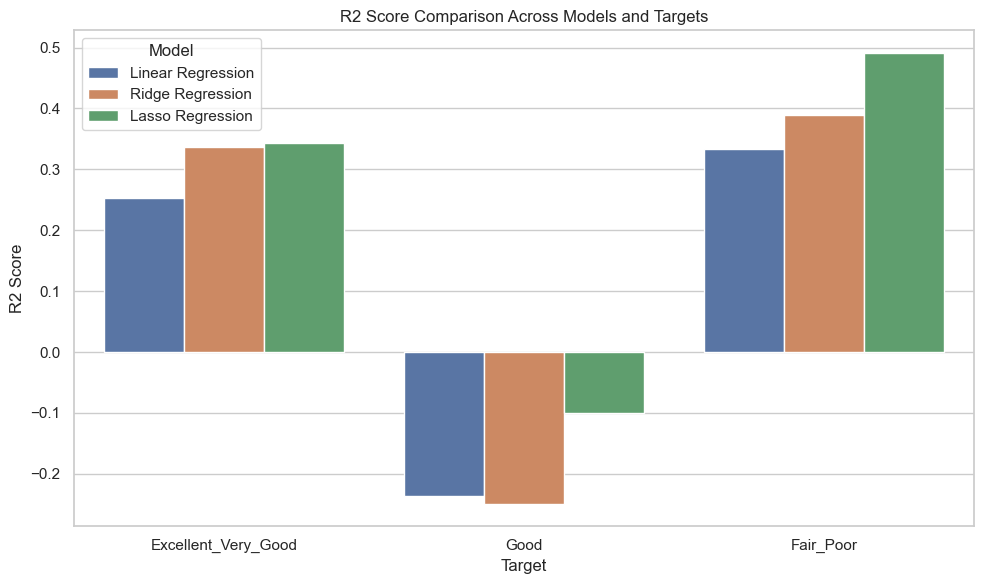

In [4]:
# Plot R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='R2 Score', hue='Model', data=results_df)
plt.title('R2 Score Comparison Across Models and Targets')
plt.ylabel('R2 Score')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

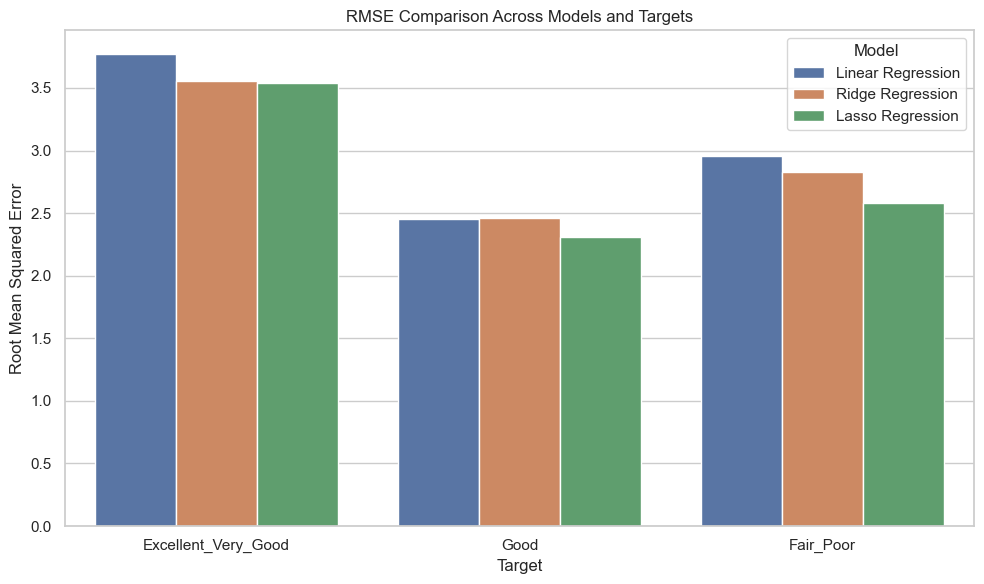

In [5]:
# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='RMSE', hue='Model', data=results_df)
plt.title('RMSE Comparison Across Models and Targets')
plt.ylabel('Root Mean Squared Error')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

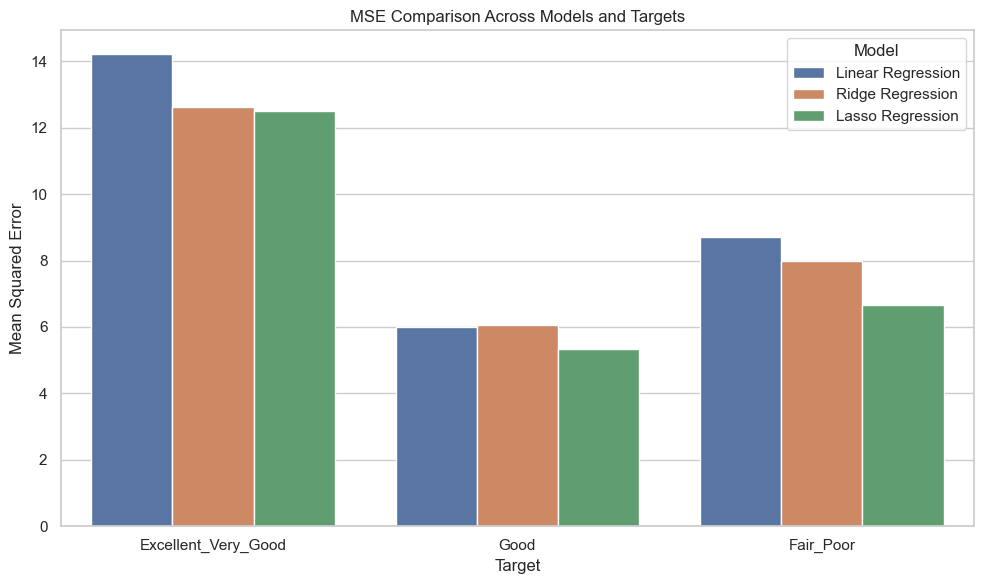

In [6]:
# Plot MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='MSE', hue='Model', data=results_df)
plt.title('MSE Comparison Across Models and Targets')
plt.ylabel('Mean Squared Error')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

C:\Users\bibis\AppData\Local\Temp\ipykernel_11640\4282879278.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mental Health Help'] = df['Mental Health Help'].replace({'<1%': 0.005}).astype(float)


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20

                Feature    Importance
0   Average_Temperature  8.885441e-01
8               Therapy  7.294064e-01
1         Precipitation  6.247152e-01
9                Stress  5.795716e-01
10    Unemployment_Rate  4.555898e-01
2                   CPI  3.436117e-01
4   Mortgage_Debt_Ratio  2.453759e-01
6               Anxiety  2.295427e-01
3      Debt_Asset_Ratio  7.306422e-02
5            Depression  6.706395e-02
7    Mental Health Help  2.043045e-21


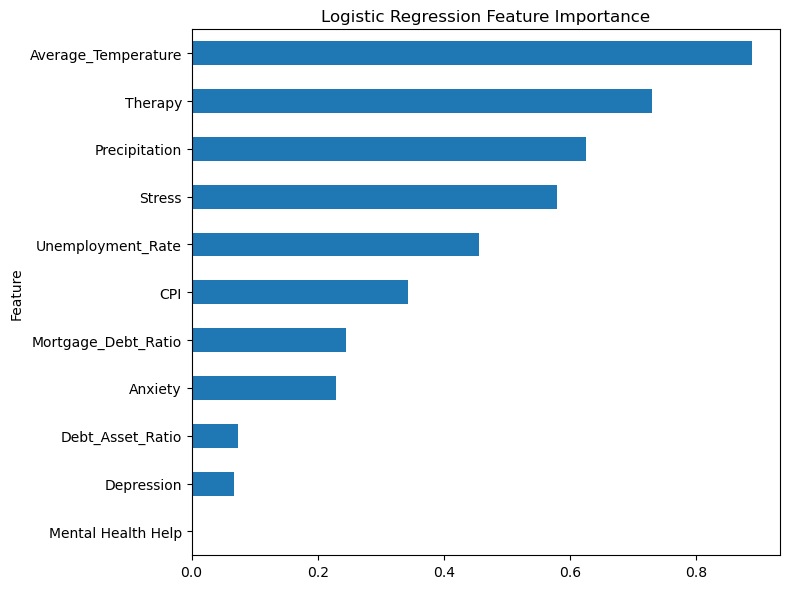

In [1]:
# 🚀 Logistic Regression Training Pipeline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_excel("Final_Filtered_Dataset.xlsx")

# 2. Clean Columns
df.rename(columns={
    'Quarterly Avg Temp (Â°C)': 'Average_Temperature',
    'Quarterly Sum Precip (mm)': 'Precipitation',
    'CPI Average': 'CPI',
    'Debt_to_Asset_Ratio': 'Debt_Asset_Ratio',
    'Mortgage_Debt_to_Real_Estate_Ratio': 'Mortgage_Debt_Ratio',
    'Unemployment Rate': 'Unemployment_Rate'
}, inplace=True)

# 3. Handle categorical and missing values
df['Mental Health Help'] = df['Mental Health Help'].replace({'<1%': 0.005}).astype(float)
df['Therapy'] = df['Therapy'].replace({'<1%': 0.005, 'Yes': 1, 'No': 0}).astype(float)

# 4. Define Features and Target
features = [
    'Average_Temperature', 'Precipitation', 'CPI',
    'Debt_Asset_Ratio', 'Mortgage_Debt_Ratio', 'Depression',
    'Anxiety', 'Mental Health Help', 'Therapy', 'Stress', 'Unemployment_Rate'
]
df[features] = df[features].fillna(df[features].median())

# Create Binary Target for Fair_Poor
df['Fair_Poor_binary'] = (df['Fair_Poor'] > df['Fair_Poor'].median()).astype(int)

X = df[features]
y = df['Fair_Poor_binary']

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 8. Evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 9. Feature Importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print(importance)

# Optional: Plot
importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8,6), legend=False)
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
